In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
df = pd.read_csv('../../data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv')
df.set_index('Time', inplace=True)
df.index = pd.to_datetime(df.index)

In [4]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


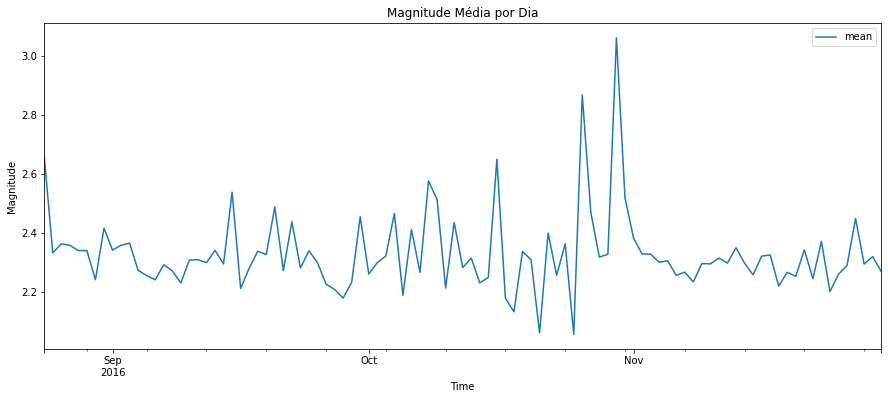

In [7]:
df['Magnitude'].resample('D').apply([np.mean]).plot()
plt.title('Magnitude Média por Dia')
plt.ylabel('Magnitude');

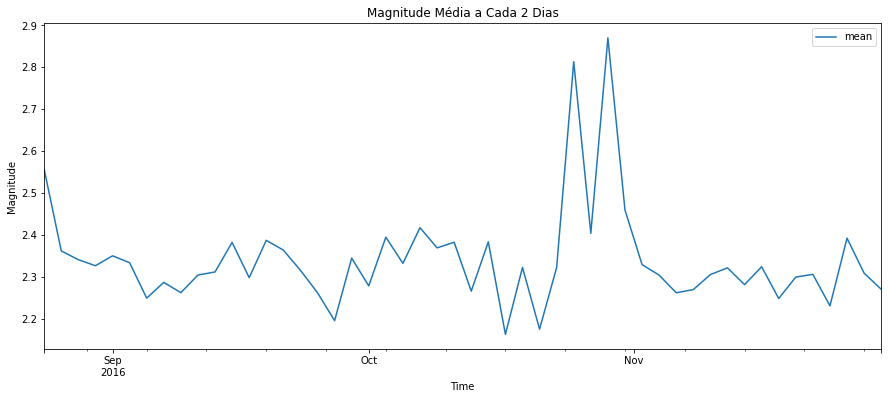

In [10]:
df['Magnitude'].resample('2D').apply([np.mean]).plot()
plt.title('Magnitude Média a Cada 2 Dias')
plt.ylabel('Magnitude');

In [11]:
magn3 = df.loc[df['Magnitude'] >= 3.0, 'Magnitude']

In [12]:
magn3

Time
2016-08-24 03:36:32.000    6.0
2016-08-24 03:37:26.580    4.5
2016-08-24 03:40:46.590    3.8
2016-08-24 03:41:38.900    3.9
2016-08-24 03:42:07.170    3.6
                          ... 
2016-11-29 06:25:21.060    3.0
2016-11-29 06:49:56.730    3.1
2016-11-29 11:29:00.440    3.2
2016-11-29 18:14:02.690    4.4
2016-11-30 16:03:06.760    3.1
Name: Magnitude, Length: 888, dtype: float64

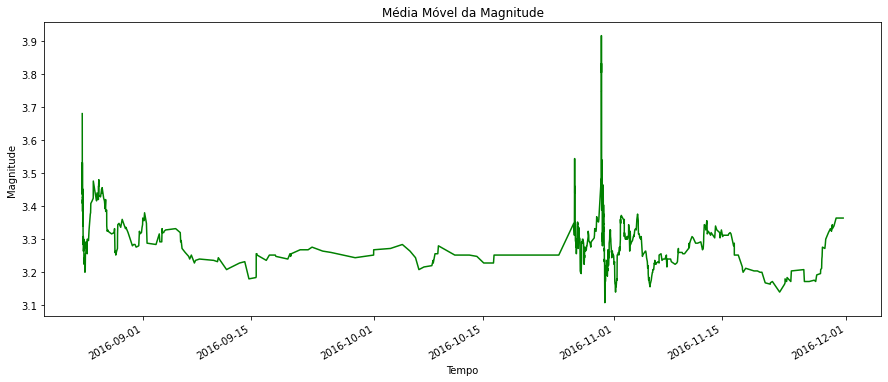

In [14]:
pd.Series.rolling(magn3, window=25).mean().plot(style='-g')
plt.title('Média Móvel da Magnitude')
plt.ylabel('Magnitude')
plt.xlabel('Tempo');

# fiz esse gráfico para repetir o que foi passado na aula, porém ele não faz sentido algum